# Problema de Negócio
📝 Identifique se perfumes com determinadas notas olfativas tendem a ser mais bem avaliados.

## Libs

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o DataSet

In [25]:
pf = pd.read_csv("perfumes.csv")

## Explorando o DataSet

In [26]:
pf.sample(10)

,Nome do perfume,Notas olfativas,Avaliação média,Número de avaliações
95,Perfume R,Especiarias,2.63,41
66,Perfume B,Herbal,2.16,849
146,Perfume C,Amadeirado,2.24,402
495,Perfume V,Amadeirado,2.53,701
24,Perfume U,Amadeirado,1.96,55
429,Perfume L,Herbal,0.34,561
426,Perfume K,Herbal,4.35,654
457,Perfume D,Floral,1.09,925
329,Perfume O,Gourmand,3.54,736
320,Perfume U,Amadeirado,0.93,824


In [27]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do perfume       500 non-null    object 
 1   Notas olfativas       500 non-null    object 
 2   Avaliação média       500 non-null    float64
 3   Número de avaliações  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [28]:
pf.shape

(500, 4)

🔎Verificando valores nulos

In [29]:
pf.isnull().sum().sort_values(ascending = False)

Nome do perfume         0
Notas olfativas         0
Avaliação média         0
Número de avaliações    0
dtype: int64

🔎Verificando valores duplicados

In [30]:
pf.duplicated().sum()

0

## Tratamento e Preparação dos Dados

> 📄Vamos criar um novo DataFrame independente para que poçamos altera-lo do jeito que queremos e não afetar a base original

In [31]:
df_perfumes = pf.copy()

In [32]:
df_perfumes.describe()

,Avaliação média,Número de avaliações
count,500.000000,500.000000
mean,2.489100,506.142000
std,1.458851,280.528012
min,0.010000,1.000000
25%,1.170000,273.500000
50%,2.525000,511.000000
75%,3.820000,750.500000
max,5.000000,997.000000


## Análise dos Dados

> 📄Com os dados preparados, podemos calcular a correlação entre as notas olfativas e a avaliação média dos perfumes.

🔎Vamos transformar a coluna Notas olfativas em colunas binárias

In [40]:
# Aplicar one-hot encoding na coluna 'Notas olfativas'
notas_olfativas = pd.get_dummies(df_perfumes['Notas olfativas'])

# Concatenar as novas colunas ao dataframe original
df = pd.concat([df_perfumes, notas_olfativas], axis=1)

# Visualizar o novo dataframe
df.head()

,Nome do perfume,Notas olfativas,Avaliação média,Número de avaliações,Amadeirado,Aquático,Cítrico,Especiarias,Floral,Frutado,Gourmand,Herbal
0,Perfume A,Floral,1.38,465,False,False,False,False,True,False,False,False
1,Perfume R,Especiarias,4.28,889,False,False,False,True,False,False,False,False
2,Perfume J,Frutado,2.82,524,False,False,False,False,False,True,False,False
3,Perfume F,Amadeirado,3.15,680,True,False,False,False,False,False,False,False
4,Perfume C,Aquático,2.24,272,False,True,False,False,False,False,False,False


🔎Calculando a Correlação

In [41]:
# Selecionar apenas as colunas numéricas (avaliação média, número de avaliações e notas olfativas)
df_numeric = df[['Avaliação média', 'Número de avaliações'] + list(notas_olfativas.columns)]

# Calcular a correlação de Pearson entre as notas olfativas e a avaliação média
correlacao = df_numeric.corr()

# Filtrar as correlações com a avaliação média
correlacao_avaliacao = correlacao['Avaliação média'].sort_values(ascending=False)
print(correlacao_avaliacao)

Avaliação média         1.000000
Especiarias             0.044147
Gourmand                0.028232
Cítrico                 0.028173
Aquático                0.019091
Frutado                -0.000848
Número de avaliações   -0.001947
Floral                 -0.036755
Amadeirado             -0.036957
Herbal                 -0.046551
Name: Avaliação média, dtype: float64


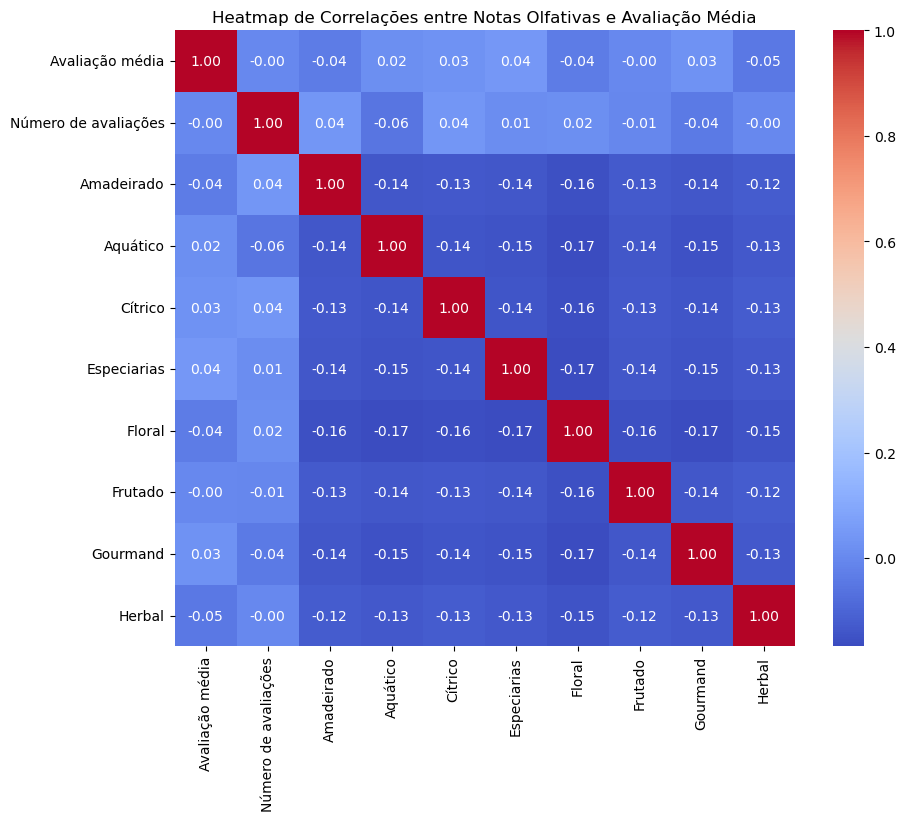

In [43]:
# Criar um heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

# Exibir o gráfico
plt.title('Heatmap de Correlações entre Notas Olfativas e Avaliação Média')
plt.show()

## Conclusão

Com base na análise das correlações, podemos concluir que:
- Perfumes com notas de Especiarias, Gourmand e Cítricos tendem a ter avaliações médias ligeiramente melhores, mas a correlação é fraca, indicando que a presença dessas notas olfativas não é um forte determinante de avaliações altas.
- Perfumes com notas de Floral, Amadeirado e Herbal tendem a ser avaliados ligeiramente pior, mas, novamente, essa relação é fraca.
- As notas olfativas não são o único fator determinante das avaliações médias dos perfumes, e outros elementos (como marketing, preço, preferências pessoais, etc.) podem influenciar as notas de forma mais significativa.